In [1]:
# xmlrpc_client.ipynb

import xmlrpclib
import pickle
import pandas as pd

server = xmlrpclib.ServerProxy("http://localhost:8008")

print 'Ping:', server.ping()

print 'Server datetime:', server.now()

print 'View, type, value:', server.type(2)
print 'View, type, value:', server.type(2.)
print 'View, type, value:', server.type('My string')
print 'View, type, value:', server.type("My string")
print 'View, type, value:', server.type([1,2,3])
print 'View, type, value:', server.type(["one", "two", "three"])
print 'View, type, value:', server.type((1,2,"3"))

print 'Sum 2 + 3 :', server.sum(2, 3)
print 'Pow 2^3: ', server.pow(2, 3)

Ping: True
Server datetime: 20190926T15:07:35
View, type, value: ['2', "<type 'int'>", 2]
View, type, value: ['2.0', "<type 'float'>", 2.0]
View, type, value: ['My string', "<type 'str'>", 'My string']
View, type, value: ['My string', "<type 'str'>", 'My string']
View, type, value: ['[1, 2, 3]', "<type 'list'>", [1, 2, 3]]
View, type, value: ["['one', 'two', 'three']", "<type 'list'>", ['one', 'two', 'three']]
View, type, value: ["[1, 2, '3']", "<type 'list'>", [1, 2, '3']]
Sum 2 + 3 : 5
Pow 2^3:  8


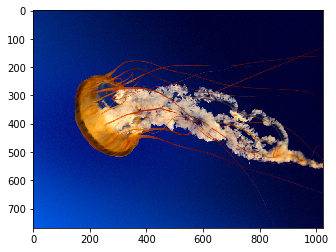

In [2]:
from PIL import Image # Работа с изображением
from pylab import * # Отображение

import xmlrpclib

# Режим отображения внутри ноутбука
%matplotlib inline

img = Image.open('Jellyfish.jpg')

img_arr = array(img)

# Исходное изображение
imshow(img_arr)

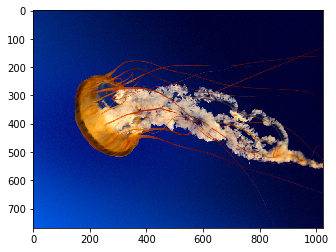

In [3]:
# Тест бинарной передачи данных
#pimg = img_arr.dumps()
pimg = pickle.dumps(img_arr) # универсально

img_bin = xmlrpclib.Binary(pimg)

img_bin2 = server.send_back_binary(img_bin)

#img_arr2 = np.loads(img_bin2.data)
img_arr2 = pickle.loads(img_bin2.data) # универсально

# Изображение после возрата с сервера
imshow(img_arr2)

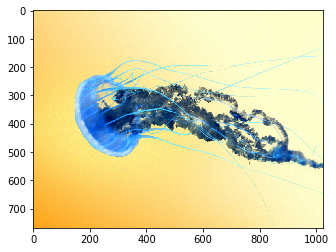

In [4]:

# Инверсия цвета изображения через сервер
def inv_color(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xmlrpclib.Binary(pimg)
    
    img_bin2 = server.color_inversion(img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_inv = inv_color(img_arr)

# Изображение с инверсией цвета
imshow(img_arr_inv)

In [5]:
print server.black_list_check(u'Петров')
print server.black_list_check(u'Примеров')


Петров: bad_boy
Примеров: good_boy
